In [ ]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from functools import partial

In [ ]:
#Load the dataset from Drive
matches_full = pd.read_csv(Path("/content/final_dataset.csv"))

In [ ]:
#Sneak peek of Data
matches_full.head()
#A lot of stuff I dont need

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
#Add a column that holds the winner
def results(row):
  #Home Won
  if (row['FTHG'] - row['FTAG']) > 0:
    return 2
    #NotHome won
  elif (row['FTHG'] - row['FTAG']) < 0:
    return 1
    #Draw
  else:
    return 0

#.apply() accepts a function that is used to add  new values to a new column ^
matches_full['Winner'] = matches_full.apply(results, axis=1)

#keep certain columns only
columns_to_keep = ['Date', 'HomeTeam', 'AwayTeam', 'Winner']
matches = matches_full[columns_to_keep]

print(matches)

          Date     HomeTeam       AwayTeam  Winner
0     19/08/00     Charlton       Man City       2
1     19/08/00      Chelsea       West Ham       2
2     19/08/00     Coventry  Middlesbrough       1
3     19/08/00        Derby    Southampton       0
4     19/08/00        Leeds        Everton       2
...        ...          ...            ...     ...
6835  13/05/18    Newcastle        Chelsea       2
6836  13/05/18  Southampton       Man City       1
6837  13/05/18      Swansea          Stoke       1
6838  13/05/18    Tottenham      Leicester       2
6839  13/05/18     West Ham        Everton       2

[6840 rows x 4 columns]


In [ ]:
#split data into 2 periods (90% train, 10% test)
#AND ONE HOT ENCODE YES BABY
matches.sort_index()
columns_to_keep = ['HomeTeam', 'AwayTeam', 'Winner']
matches = matches_full[columns_to_keep]
matches = pd.get_dummies(matches)

train_set = matches[0:6156]
test_set = matches[6157:]

In [ ]:
print(matches)

      Winner  HomeTeam_Arsenal  HomeTeam_Aston Villa  HomeTeam_Birmingham  \
0          2                 0                     0                    0   
1          2                 0                     0                    0   
2          1                 0                     0                    0   
3          0                 0                     0                    0   
4          2                 0                     0                    0   
...      ...               ...                   ...                  ...   
6835       2                 0                     0                    0   
6836       1                 0                     0                    0   
6837       1                 0                     0                    0   
6838       2                 0                     0                    0   
6839       2                 0                     0                    0   

      HomeTeam_Blackburn  HomeTeam_Blackpool  HomeTeam_Bolton  \
0         

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
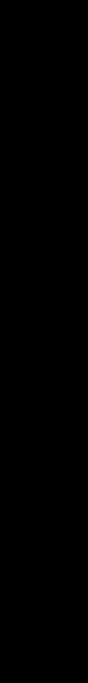

In [ ]:
X_train = train_set.drop('Winner', axis=1 )
X_train.to_numpy()

#Kind of like casting it into categories
train_y = matches[0:6156]['Winner']
train_y = tf.keras.utils.to_categorical(train_y,3)

y_test = matches['Winner'][6157:]
y_test = tf.keras.utils.to_categorical(y_test,3)

X_test = test_set.drop('Winner', axis=1 )
X_test.to_numpy()


In [ ]:
print(train_y.shape)

(6156, 3)


In [ ]:
print(X_train)

      HomeTeam_Arsenal  HomeTeam_Aston Villa  HomeTeam_Birmingham  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    0   
...                ...                   ...                  ...   
6151                 0                     0                    0   
6152                 0                     0                    0   
6153                 0                     0                    0   
6154                 0                     0                    0   
6155                 0                     0                    0   

      HomeTeam_Blackburn  HomeTeam_Blackpool  HomeTeam_Bolton  \
0                      0                   0                0   
1                      0                 

In [ ]:
DefaultRNN = partial(tf.keras.layers.SimpleRNN, units = 32, activation = 'relu',  return_sequences=True)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(32, input_dim=88, activation='tanh'))
model.add(tf.keras.layers.Reshape((1, 32)))
model.add(DefaultRNN())
model.add(DefaultRNN())
model.add(DefaultRNN())
model.add(DefaultRNN(return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.build()
model.summary()

NameError: name 'partial' is not defined

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, train_y, epochs=20)

NameError: name 'model' is not defined

In [ ]:
#accuracy history
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
print(y_test)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
model.evaluate(X_test,  y_test, verbose = 2)

22/22 - 1s - loss: 1.0347 - accuracy: 0.4978 - 921ms/epoch - 42ms/step


[1.0346705913543701, 0.49780380725860596]